In [7]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Fabio Palmisano -*-
# -*- date : 2024-01-20 -*-
# -*- Last revision: 2024-01-20 (Vincent Roduit)-*-
# -*- python version : 3.11.6 -*-
# -*- Description: Notebook that summarizes results-*-

# <center> EE - 411: Fundamentals of Inference and Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Deep Double Descent: When Bigger Models and More Data Hurt </center>
---

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import librairies
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Import files
import constants
from models.resnet18k import make_resnet18k
from training_utils import*

# 1. Data preprocessing

## 1.1 Load data

### 1.1.1 Normal version

In [11]:
transform = transforms.Compose([
    transforms.ToTensor()
])
# -*- LOAD CIFAR 10 -*-

#Train Dataset
CIFAR_10_train_dataset = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

#Test Dataset
CIFAR_10_test_dataset = torchvision.datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

# -*- LOAD CIFAR 100 -*-

#Train Dataset
CIFAR_100_train_dataset = torchvision.datasets.CIFAR100(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

#Test Dataset
CIFAR_100_test_dataset = torchvision.datasets.CIFAR100(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### 1.1.2. Augmented version

In [21]:
transform_augmented = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

# -*- LOAD CIFAR 10 -*-

#Train Dataset
CIFAR_10_train_dataset_aug = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform=transform_augmented)

#Test Dataset
CIFAR_10_test_dataset_aug = torchvision.datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform=transform_augmented)

# -*- LOAD CIFAR 100 -*-

#Train Dataset
CIFAR_100_train_dataset_aug = torchvision.datasets.CIFAR100(
    root='./data/',
    train=True,
    download=True,
    transform=transform_augmented)

#Test Dataset
CIFAR_100_test_dataset_aug = torchvision.datasets.CIFAR100(
    root='./data/',
    train=False,
    download=True,
    transform=transform_augmented)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## 1.2 Create Dataloader

### 1.2.1 Normal version

In [27]:
CIFAR_10_train_dataloader = torch.utils.data.DataLoader(
    dataset=CIFAR_10_train_dataset,
    batch_size=constants.BATCH_SIZE,
    shuffle=True,
    num_workers=2)


# Construct the dataloader for the testing dataset.
CIFAR_10_test_dataloader = torch.utils.data.DataLoader(
    dataset=CIFAR_10_test_dataset,
    batch_size=constants.TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

CIFAR_100_train_dataloader = torch.utils.data.DataLoader(
    dataset=CIFAR_100_train_dataset,
    batch_size=constants.BATCH_SIZE,
    shuffle=True,
    num_workers=2)


# Construct the dataloader for the testing dataset.
CIFAR_100_test_dataloader = torch.utils.data.DataLoader(
    dataset=CIFAR_100_test_dataset,
    batch_size=constants.TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

### 1.2.2 Augmented version

In [28]:
CIFAR_10_train_dataloader_aug = torch.utils.data.DataLoader(
    dataset=CIFAR_10_train_dataset_aug,
    batch_size=constants.BATCH_SIZE,
    shuffle=True,
    num_workers=2)


# Construct the dataloader for the testing dataset.
CIFAR_10_test_dataloader_aug = torch.utils.data.DataLoader(
    dataset=CIFAR_10_test_dataset_aug,
    batch_size=constants.TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

CIFAR_100_train_dataloader_aug = torch.utils.data.DataLoader(
    dataset=CIFAR_100_train_dataset_aug,
    batch_size=constants.BATCH_SIZE,
    shuffle=True,
    num_workers=2)


# Construct the dataloader for the testing dataset.
CIFAR_100_test_dataloader_aug = torch.utils.data.DataLoader(
    dataset=CIFAR_100_test_dataset_aug,
    batch_size=constants.TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=2)

## 1.3 Vizualize the Dataset

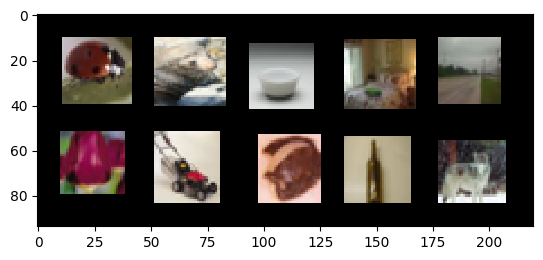

In [29]:
images = next(iter(CIFAR_100_train_dataloader_aug))[0][:10]
grid = torchvision.utils.make_grid(images, nrow=5, padding=10)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

show(grid)

# 2. Produce Figure 4

## 2.1 CIFAR 10

In [42]:
width_model_list = np.linspace(1, 64, 20,dtype=int)

train_losses = []
test_losses = []
accuracies = []

for width in width_model_list:
    ResNet = make_resnet18k(k=width)
    cnn = ResNet.to(constants.DEVICE)
    optimizer = torch.optim.SGD(cnn.parameters(), lr=constants.Adam_LR)
    losses = fit(
        model=cnn,
        train_dataloader=CIFAR_10_train_dataloader,
        optimizer=optimizer,
        epochs=constants.NUM_EPOCHS,
        device=constants.DEVICE
    )
    test_loss, acc = predict(model=cnn, test_dataloader=test_dataloader, device=DEVICE)
    train_losses.append(losses)
    test_losses.append(test_loss)
    accuracies.append(acc)

KeyboardInterrupt: 

## 2.2 CIFAR 100

In [ ]:
width_model_list = np.linspace(1, 64, 20,dtype=int)

train_losses = []
test_losses = []
accuracies = []

for width in width_model_list:
    ResNet = make_resnet18k(k=width)
    cnn = ResNet.to(constants.DEVICE)
    optimizer = torch.optim.SGD(cnn.parameters(), lr=constants.Adam_LR)
    losses = fit(
        model=cnn,
        train_dataloader=CIFAR_100_train_dataloader,
        optimizer=optimizer,
        epochs=constants.NUM_EPOCHS,
        device=constants.DEVICE
    )
    test_loss, acc = predict(model=cnn, test_dataloader=test_dataloader, device=DEVICE)
    train_losses.append(losses)
    test_losses.append(test_loss)
    accuracies.append(acc)